# Apple Store Apps Data EDA 

Here in this notebook, we will be visualizing the mobile app store (Apple iOS App Store) dataset via multiple libraries. Then we will be able to make conclusions along the way.

In [1]:
# import the libraries we gonna be using
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
# for making plots with seaborn
import seaborn as sns 
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
import plotly

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

First of all we will get the data from a csv file "AppleStore.csv" available on Kaggle to take a look at it 

In [4]:
# get the dataset we gonna be using 
data = pd.read_csv('AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

Let's have a look at the contents of the dataset and what each column means :

1 - "id" : App ID

2 - "track_name": App Name

3 - "size_bytes": Size (in Bytes)

4 - "currency": Currency Type

5 - "price": Price amount

6 - "rating_count_tot": User Rating counts (for all version)

7 - "rating_count_ver": User Rating counts (for current version)

8 - "user_rating" : Average User Rating value (for all version)

9 - "user_rating_ver": Average User Rating value (for current version)

10 - "ver" : Latest version code

11 - "cont_rating": Content Rating

12 - "prime_genre": Primary Genre

13 - "sup_devices.num": Number of supporting devices

14 - "ipadSc_urls.num": Number of screenshots showed for display

15 - "lang.num": Number of supported languages

16 - "vpp_lic": Vpp Device Based Licensing Enabled


In [6]:
# check the types of data each column is 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 815.3+ KB


In [7]:
# get the size of the dataset
data.shape

(7197, 17)

In [8]:
# check if we have any missing values in the dataset 
data.isnull().any()

Unnamed: 0          False
id                  False
track_name          False
size_bytes          False
currency            False
price               False
rating_count_tot    False
rating_count_ver    False
user_rating         False
user_rating_ver     False
ver                 False
cont_rating         False
prime_genre         False
sup_devices.num     False
ipadSc_urls.num     False
lang.num            False
vpp_lic             False
dtype: bool

In [9]:
# drop few columns 
df = data.drop(data.columns[[0,13,14,15,16]] , axis = 1)

In [10]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference


Now we gonna focus on the different categories there is :

In [11]:
df.prime_genre.nunique()

23

In [12]:
df.prime_genre.unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

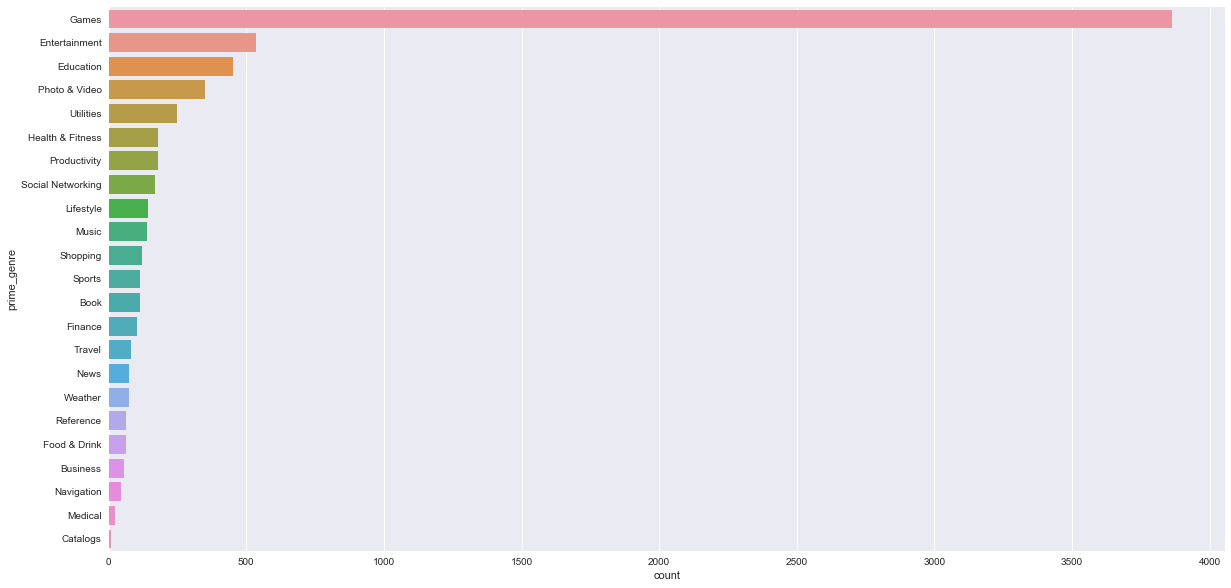

In [13]:
#Number of categories of apps in the store : 
plt.figure(figsize=(20,10))
sns.countplot(y = df['prime_genre'], data = df , order = df['prime_genre'].value_counts().index)

In [14]:
number_of_apps_in_category = df['prime_genre'].value_counts().sort_values(ascending=True)

In [15]:
labels = number_of_apps_in_category.index
values = number_of_apps_in_category.values
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hiba.cypher/0 or inside your plot.ly account where it is named 'basic_pie_chart'


In [16]:
# Tabular representation
top_cat=df.groupby('prime_genre').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

,prime_genre,Count
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180


As we can see that the categories "games' and "entertainment" are the most installed genre followed by "education" and "photograhy"

In [17]:
# correlation :
df.corr()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver
id,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849
size_bytes,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075
price,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173
rating_count_tot,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744
rating_count_ver,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840
user_rating,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140
user_rating_ver,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000


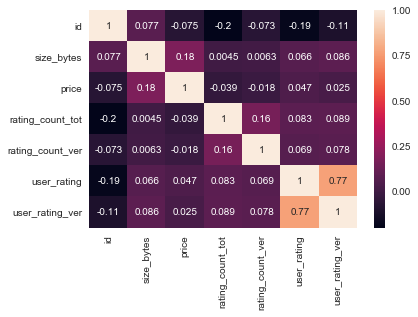

In [18]:
sns.heatmap(df.corr() , annot =True)

As we can see, there is a weak correlation between user rating version and user ratings.

Now we will add a column for the type of apps either paid or free so that it will help us have futher analysis on how the price of an app effect the ratings or how much that app get installed 

In [19]:
df['Type'] = df['price'].map(lambda x: 'free' if x == 0 else 'paid')

In [20]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Type
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,free
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,free
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,free
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,free


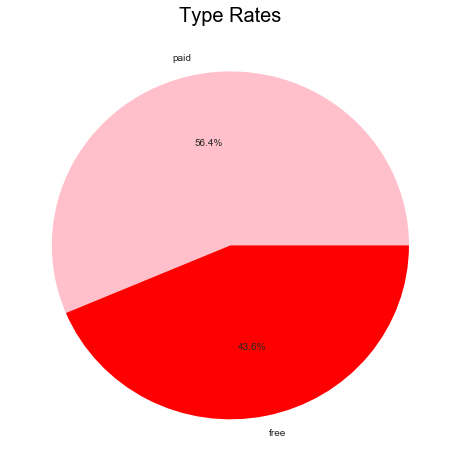

In [21]:
app_type=df.Type.unique()
app_type_value=df.Type.value_counts()

colors=["pink","red"]
explode=[0,0]

#Visualization
plt.figure(figsize=(8,8))
plt.pie(app_type_value,explode=explode,labels=app_type,colors=colors,autopct="%1.1f%%")
plt.title("Type Rates",color="black",fontsize=20)
plt.show()

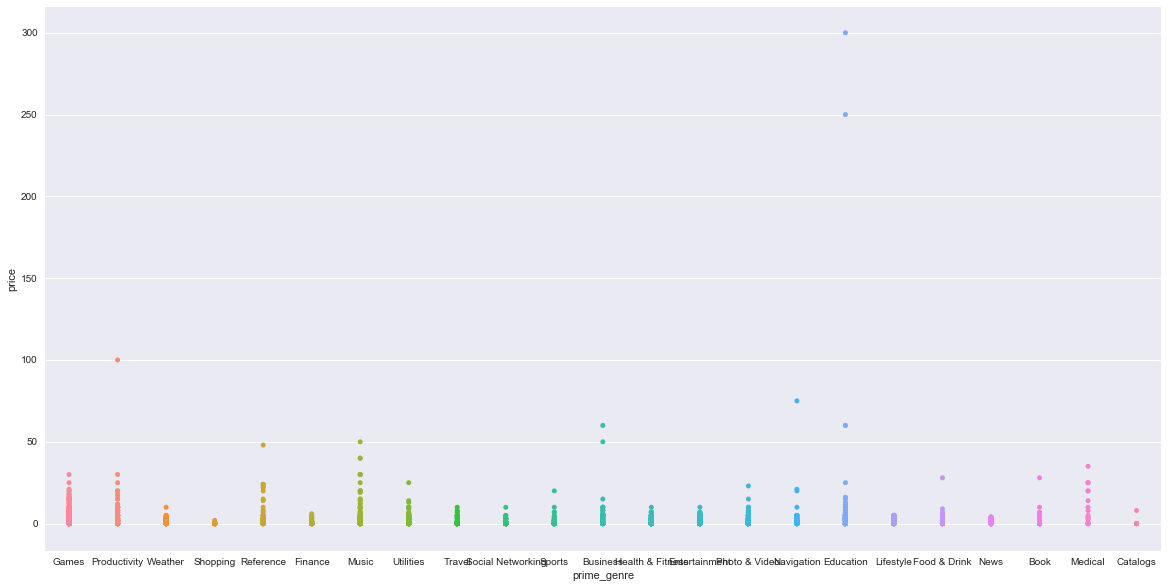

In [22]:
plt.figure(figsize=(20,10))
sns.stripplot(x= df['prime_genre']  ,y = df['price'] , data = df)

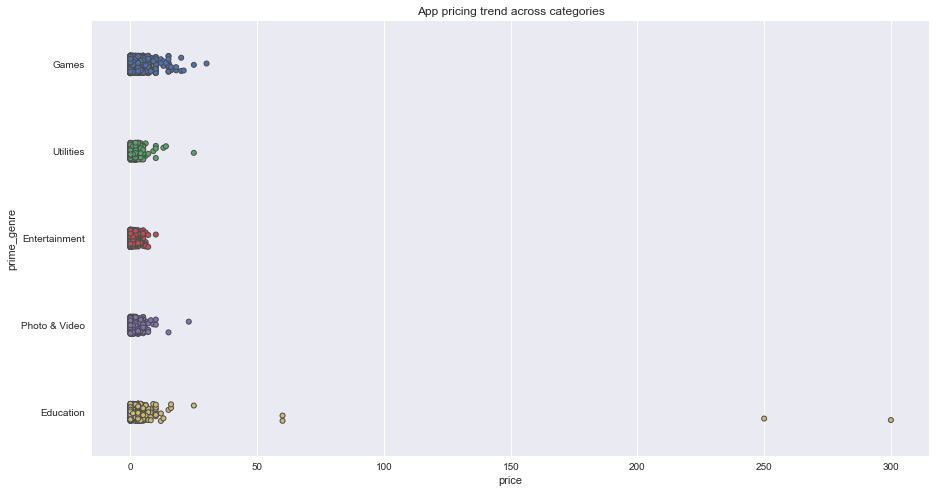

In [23]:
# the apps pricing trends in the top 5 categories
subset_df = df[df.prime_genre.isin(['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities', ])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="price", y="prime_genre", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

In [24]:
#print('apps priced above 50$')
df[['prime_genre', 'track_name' , 'price']][df.price > 50]

,prime_genre,track_name,price
115,Education,Proloquo2Go - Symbol-based AAC,249.99
162,Navigation,NAVIGON Europe,74.99
1136,Education,Articulation Station Pro,59.99
1479,Education,LAMP Words For Life,299.99
2181,Education,Articulation Test Center Pro,59.99
2568,Productivity,KNFB Reader,99.99
3238,Business,FineScanner Pro - PDF Document Scanner App + OCR,59.99


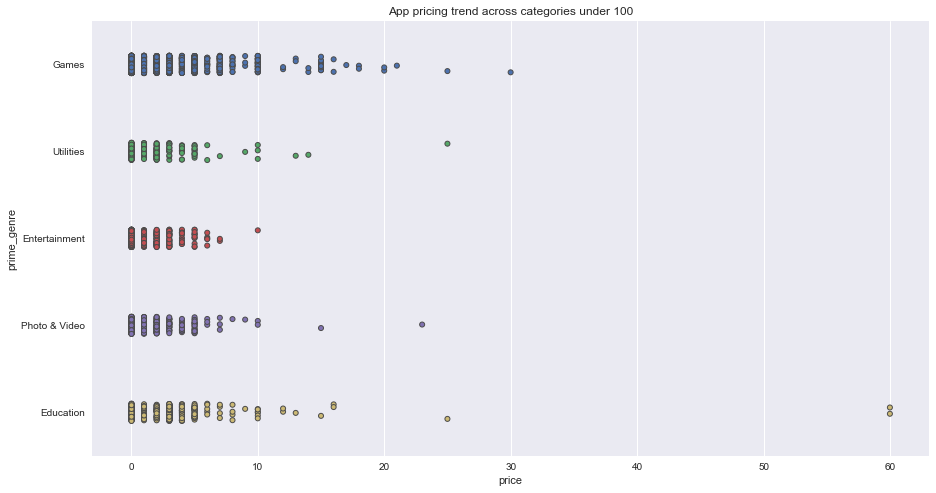

In [25]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.price <=100]
p = sns.stripplot(x="price", y="prime_genre", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories under 100')

Clearly, Education apps are the most expensive. Some apps extend even upto 50$.

All other apps are priced under 30$.

Surprisingly, all game apps are reasonably priced below 20$.

Count of paid apps is exponentially decreases as the price increases

Now let's see how the price effect the ratings of an app

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



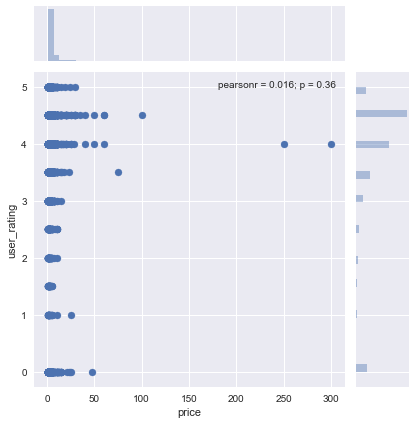

In [26]:
paid_apps = df[df.price>0]
p = sns.jointplot( "price", "user_rating", paid_apps)

Most top rated apps are optimally priced between 0$ and   30$ . There are only a very few apps priced above 20$.

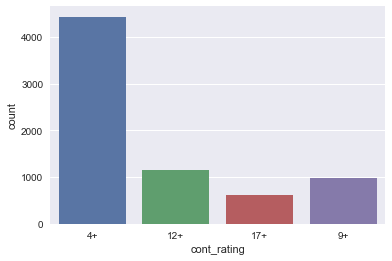

In [27]:
sns.countplot(x = "cont_rating" , data = df)

In [28]:
df[df.user_rating >= 5].head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,Type
21,285994151,:) Sudoku +,6169600,USD,2.99,11447,781,5.0,5.0,5.2.6,4+,Games,paid
230,335545504,King of Dragon Pass,364490752,USD,9.99,882,85,5.0,5.0,2.3.2,12+,Games,paid
271,342548956,TurboScan™ Pro - document & receipt scanner: s...,8821760,USD,4.99,28388,7009,5.0,5.0,2.8.2,4+,Business,paid
302,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,paid
318,353372460,Learn to Speak Spanish Fast With MosaLingua,48819200,USD,4.99,9,1,5.0,5.0,9.2,12+,Education,paid


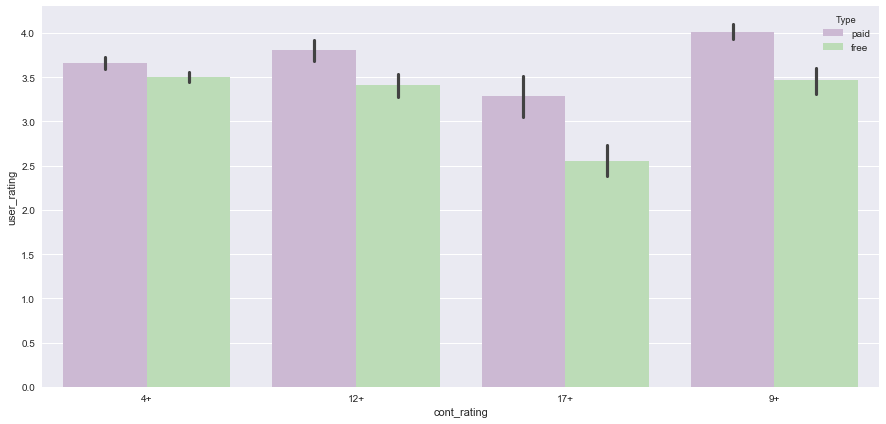

In [29]:
plt.figure(figsize = (15,7))
sns.barplot(x='cont_rating', y='user_rating', hue='Type', data=df, palette='PRGn')
plt.show()

We can come with something like "people are tend to vote higher when they pay for it".